# Drawing tests

In [1]:
import rdkit
import rdkit.Chem as ch
import rdkit.Chem.Draw as dr 
from rdkit.Chem import rdFMCS as fmcs
dr.IPythonConsole.ipython_useSVG=True #Saving in SVG format
dr.IPythonConsole.drawOptions.addAtomIndices = True #Inidicators on atoms
dr.IPythonConsole.drawOptions.addStereoAnnotation = True #Differense of steroPosition
dr.rdDepictor.SetPreferCoordGen(True) #

In [2]:
Smiles = ch.MolFromSmiles #function to convert to smiles

In [3]:
mol1=Smiles("C1(C2=CC=CC=C2)CCCCC1")
mol2= Smiles("c1ncncc1C(=O)[O-]")
mol3=Smiles('C1CC1[C@H](F)C1CCC1')

mol41=Smiles('CC1=CC=CC(C2C=CC=C2)=C1')
mol42=Smiles('C1=CC=CC=C1')

dr.MolsToGridImage([mol41,mol42]);#Create picture

In [4]:
def view_difference(mol1, mol2):
    mcs = fmcs.FindMCS([mol1,mol2]) #Find similar fragmens
    mcs_mol = ch.MolFromSmarts(mcs.smartsString) #create mol object of kernel 2 molecules
    
    match1 = mol1.GetSubstructMatch(mcs_mol)
    target_atm1 = []
    for atom in mol1.GetAtoms():
        if atom.GetIdx() not in match1:
            target_atm1.append(atom.GetIdx())
   
    match2 = mol2.GetSubstructMatch(mcs_mol)
    target_atm2 = []
    for atom in mol2.GetAtoms():
        if atom.GetIdx() not in match2:
            target_atm2.append(atom.GetIdx())
    return dr.MolsToGridImage([mol1, mol2],highlightAtomLists=[target_atm1, target_atm2])

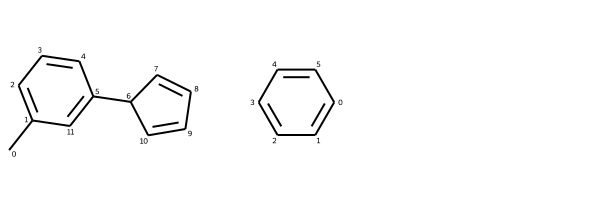

In [5]:
dr.MolsToGridImage([mol41,mol42])

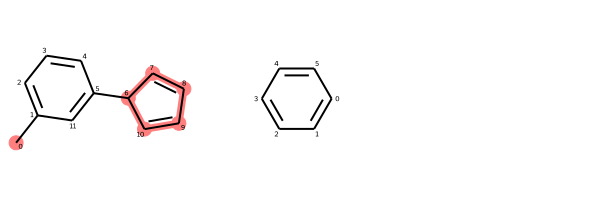

In [6]:
view_difference(mol41,mol42)

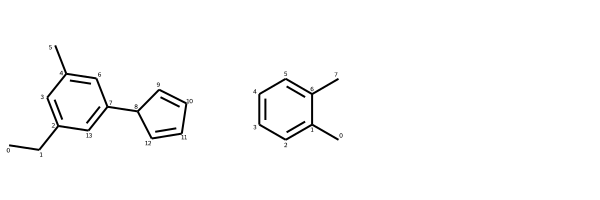

In [7]:
mol11=Smiles('CCC1=CC(C)=CC(C2C=CC=C2)=C1')
mol12=Smiles('CC1=CC=CC=C1C')
dr.MolsToGridImage([mol11,mol12])

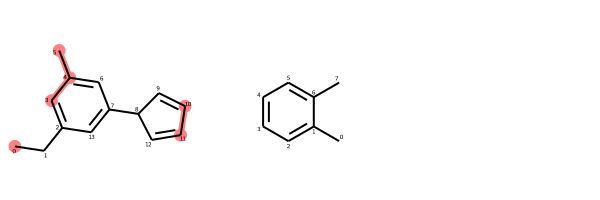

In [8]:
view_difference(mol11,mol12)

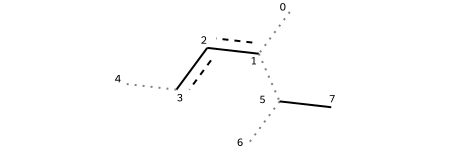

In [9]:
mcs = fmcs.FindMCS([mol11,mol12]) #Find similar fragmens
mcs_mol = ch.MolFromSmarts(mcs.smartsString) #create mol object of kernel 2 molecules
mcs_mol

In [10]:
from rdkit.Chem import rdAbbreviations as abr #abreviature

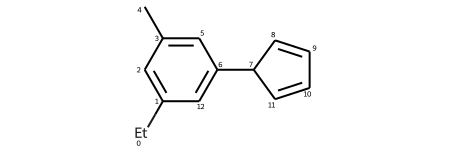

In [11]:
abbrevs=abr.GetDefaultAbbreviations()
mol_abr= abr.CondenseMolAbbreviations(mol11,abbrevs)
mol_abr

In [12]:
for ab in abbrevs:
    print(ab.label)

CO2Et
COOEt
OiBu
nDec
nNon
nOct
nHept
nHex
nPent
iPent
tBu
iBu
nBu
iPr
nPr
Et
NCF3
CF3
CCl3
CN
NC
N(OH)CH3
NO2
NO
SO3H
CO2H
COOH
OEt
OAc
NHAc
Ac
CHO
NMe
SMe
OMe
CO2-
COO-


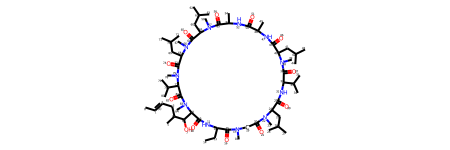

In [13]:
mol = ch.MolFromSmiles("C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C")
mol

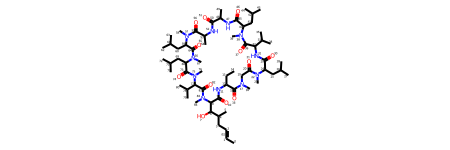

In [14]:
ch.rdCoordGen.AddCoords(mol) # Draw big cycles normaly
mol

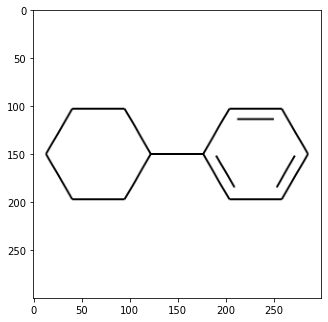

In [15]:
# Molecules in plot
import matplotlib.pyplot as plt
import numpy as np
mol_png = dr.MolToImage(mol1)
ax = plt.axes([0.5, 0.5, 1, 1], frameon=True)
ax.imshow(mol_png)

# Molecular properties 

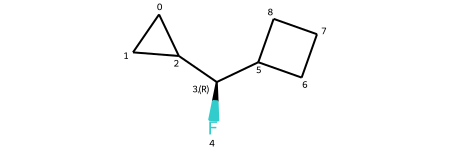

In [16]:
mol3

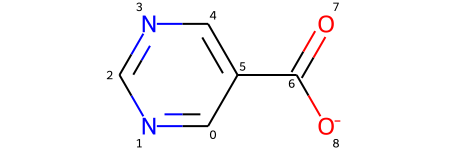

In [17]:
mol2

In [23]:
for atom in mol2.GetAtoms():
    print(atom.GetSymbol(),atom.GetIdx(),atom.GetHybridization()) #Hybridisation

C 0 SP2
N 1 SP2
C 2 SP2
N 3 SP2
C 4 SP2
C 5 SP2
C 6 SP2
O 7 SP2
O 8 SP2


In [19]:
def indicate_rings(mol):
    rings = mol.GetRingInfo()
    rings= rings.AtomRings()
    for ring in rings:
        print(ring)
        

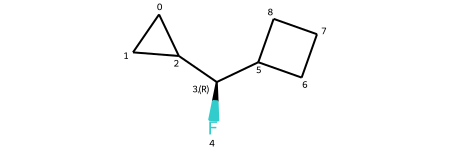

In [20]:
mol3

In [21]:
indicate_rings(mol3)

(0, 1, 2)
(6, 7, 8, 5)


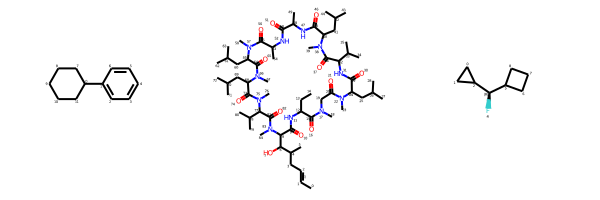

In [24]:
dr.MolsToGridImage([mol1,mol,mol3])

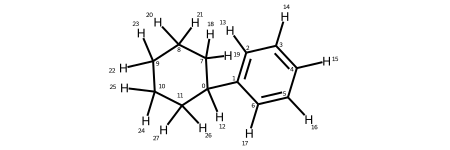

In [32]:
mol2=ch.AddHs(mol1)
mol3=ch.AddHs(mol2)
mol3